<a href="https://colab.research.google.com/github/Vick606/Handwritten-Digit-Classifier/blob/main/Day1_Handwritten_Digit_Classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Project Name: Handwritten Digit Classifier

## Overview
This project builds a **neural network** using TensorFlow to classify handwritten digits from the MNIST dataset. The MNIST dataset consists of 70,000 grayscale images of digits (0–9), each of size 28x28 pixels. The goal is to train a model that can accurately predict the digit in a given image.

## Key Features
- **Dataset**: MNIST (70,000 images, 60,000 for training, 10,000 for testing).
- **Model**: A simple feedforward neural network with one hidden layer.
- **Visualizations**: Training/validation accuracy and loss curves, sample predictions.
- **Skills Demonstrated**: Data preprocessing, neural network design, model evaluation, and visualization.

## Why This Project?
- This project is an inspiration from my freeCodeCamp Machine Learning Course
- And part of my #100DaysOfCode Challenge on X
- Demonstrates foundational skills in **deep learning** and **TensorFlow**.
- Highlights ability to preprocess data, build models, and analyze results.
- Perfect for showcasing **machine learning** and **data science** skills on a resume.

### Step 1: Import Libraries
- **TensorFlow**: For building and training the neural network.
- **NumPy**: For numerical operations.
- **Matplotlib**: For visualizing the results.

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

### Step 2: Load and Preprocess Data
- The MNIST dataset is loaded using `tf.keras.datasets.mnist`.
- The pixel values are normalized to the range [0, 1] to improve training efficiency.

In [2]:
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Normalize the data (scale pixel values to 0–1)
x_train, x_test = x_train / 255.0, x_test / 255.0

### Step 3: Build the Model
- A simple feedforward neural network is built using `tf.keras.Sequential`.
- The model consists of:
  - A `Flatten` layer to convert 28x28 images into a 784-pixel vector.
  - A `Dense` layer with 128 units and ReLU activation.
  - A `Dropout` layer to prevent overfitting.
  - An output `Dense` layer with 10 units (one for each digit).

In [3]:
# Step 3: Build the model
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(10)
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


### Step 4: Compile the Model
- The model is compiled with:
  - **Adam optimizer**: For efficient gradient descent.
  - **Sparse Categorical Crossentropy**: As the loss function.
  - **Accuracy**: As the evaluation metric.

In [4]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

### Step 5: Train the Model
- The model is trained for 10 epochs.
- Training and validation accuracy/loss are stored for visualization.

In [5]:
history = model.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test))

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.8615 - loss: 0.4727 - val_accuracy: 0.9568 - val_loss: 0.1476
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.9554 - loss: 0.1549 - val_accuracy: 0.9709 - val_loss: 0.0974
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.9683 - loss: 0.1059 - val_accuracy: 0.9734 - val_loss: 0.0842
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9733 - loss: 0.0839 - val_accuracy: 0.9779 - val_loss: 0.0758
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.9773 - loss: 0.0753 - val_accuracy: 0.9758 - val_loss: 0.0761
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9802 - loss: 0.0641 - val_accuracy: 0.9787 - val_loss: 0.0693
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.9820 - loss: 0.0555 - val_accuracy: 0.9776 - val_loss: 0.0724
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.9835 - loss: 0.049

### Step 6: Visualize Training Progress
- Training and validation accuracy/loss curves are plotted to analyze model performance.

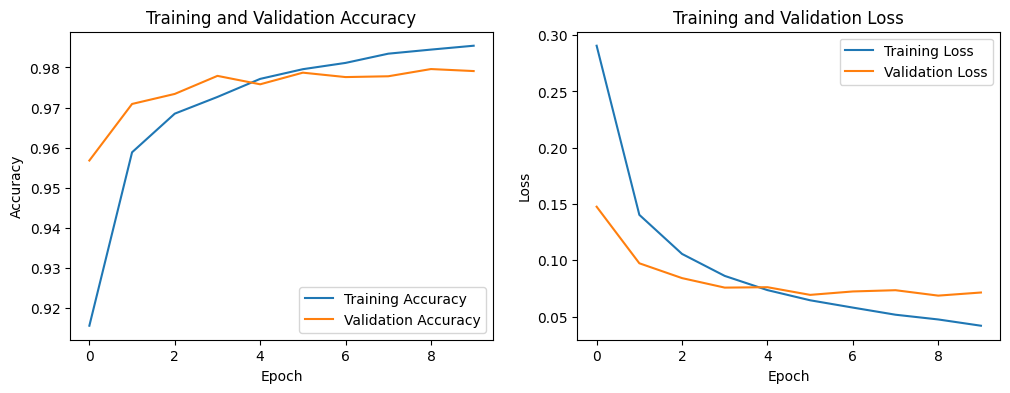

In [6]:
def plot_training_history(history):
    plt.figure(figsize=(12, 4))

    # Plot accuracy
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title('Training and Validation Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()

    # Plot loss
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Training and Validation Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()

    plt.show()

plot_training_history(history)

### Step 7: Evaluate the Model
- The model is evaluated on the test set to measure its generalization performance.

In [7]:
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print(f"\nTest accuracy: {test_acc:.2f}")

313/313 - 1s - 2ms/step - accuracy: 0.9791 - loss: 0.0714

Test accuracy: 0.98


### Step 8: Make Predictions
- Predictions are made on the first 5 test images.
- The true and predicted labels are displayed alongside the images.

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step


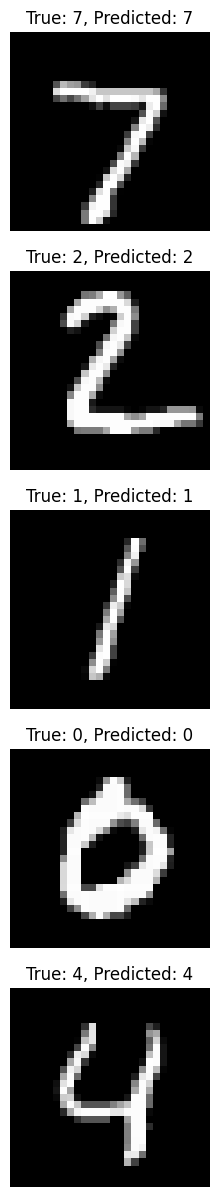

In [8]:
def plot_predictions(images, labels, predictions, num_images=5):
    plt.figure(figsize=(15, 3 * num_images))
    for i in range(num_images):
        plt.subplot(num_images, 1, i + 1)
        plt.imshow(images[i], cmap='gray')
        predicted_label = np.argmax(predictions[i])
        true_label = labels[i]
        plt.title(f"True: {true_label}, Predicted: {predicted_label}")
        plt.axis('off')
    plt.show()

# Get predictions for the first 5 test images
predictions = model.predict(x_test[:5])
plot_predictions(x_test[:5], y_test[:5], predictions)

## Conclusion

### Skills Demonstrated
- **Data Preprocessing**: Normalization and preparation of image data.
- **Model Building**: Designing a neural network using TensorFlow.
- **Training and Evaluation**: Training a model and evaluating its performance.
- **Visualization**: Plotting training/validation curves and sample predictions.

### Key Takeaways
- Achieved a test accuracy of **98%** on the MNIST dataset.
- Demonstrated the ability to build, train, and evaluate a neural network.
- Highlighted skills in **deep learning**, **data visualization**, and **model interpretation**.

### Next Steps
- Experiment with more complex architectures (e.g., CNNs).
- Apply the model to real-world handwritten digit recognition tasks.
- Explore hyperparameter tuning to improve performance.